In [42]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [9]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [10]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [11]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
ss = StandardScaler()
normalized_data = ss.fit_transform(market_data_df) 

In [13]:
# Create a DataFrame with the scaled data
normalized_df = pd.DataFrame(normalized_data, columns=market_data_df.columns, index=market_data_df.index)

# Copy the crypto names from the original data
normalized_df['coin_id'] = market_data_df.index

# Set the coinid column as index
normalized_df.set_index('coin_id', inplace=True)

# Display sample data
normalized_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [16]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=1)
    kmeans.fit(normalized_df)
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df.head(10)

c:\Users\HollidayDDS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HollidayDDS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HollidayDDS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HollidayDDS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


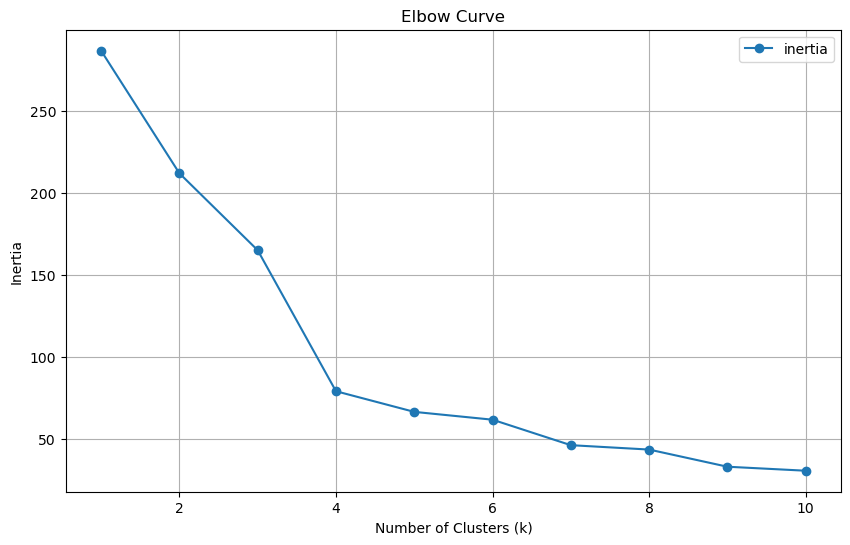

In [18]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot(x='k', y='inertia', kind='line', marker='o', figsize=(10, 6), title='Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** Between 4 and 6. 4 or 5.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [19]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=5, random_state=0)


In [20]:
# Fit the K-Means model using the scaled data
clusters = kmeans.fit_predict(normalized_df)


c:\Users\HollidayDDS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [21]:
# Predict the clusters to group the cryptocurrencies using the scaled data
prediction = kmeans.predict(normalized_df)

# View the resulting array of cluster values.
prediction

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 4, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [22]:
# Create a copy of the DataFrame
normalized_copy_df = normalized_df.copy()

In [24]:
# Add a new column to the DataFrame with the predicted clusters
normalized_df['Prediction'] = prediction

# Display sample data
normalized_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Prediction
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


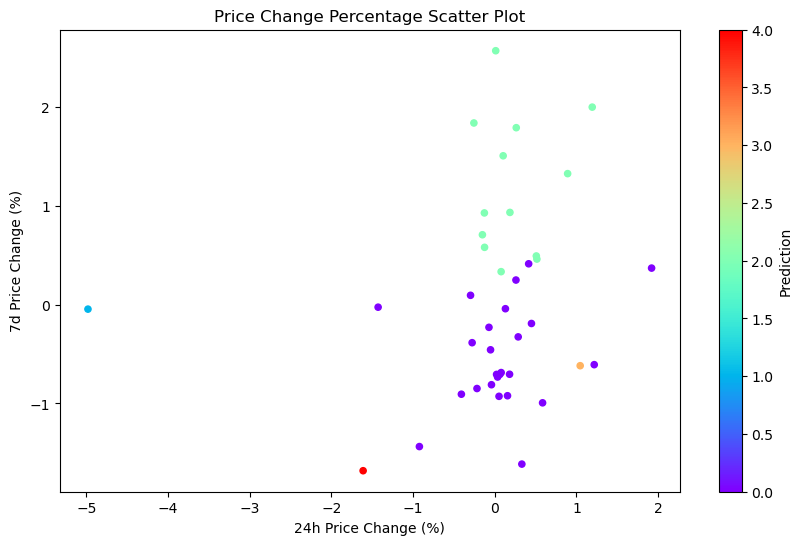

In [27]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
normalized_df.plot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='Prediction',
    colormap='rainbow',
    figsize=(10, 6),
    title='Price Change Percentage Scatter Plot'
)

plt.xlabel('24h Price Change (%)')
plt.ylabel('7d Price Change (%)')
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [28]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [29]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
transformed = pca.fit_transform(normalized_df)

# View the first five rows of the DataFrame. 
print(transformed[:5])

[[ 0.93942079 -1.05328374 -0.61480315]
 [ 0.80542001 -0.74244741 -1.15202184]
 [-0.8277125  -0.19722311  0.73175761]
 [-0.8639139  -0.20529826  0.56468121]
 [ 1.67217731 -2.19508424 -1.55148593]]


In [30]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.37783195, 0.31173774, 0.17096314])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [33]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(transformed, columns=['PCA1','PCA2','PCA3'], index=market_data_df.index)

# Copy the crypto names from the original data
pca_df['coin_id'] = market_data_df.index

# Set the coinid column as index
pca_df.set_index('coin_id', inplace=True)

# Display sample data
pca_df.head(10)

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,0.939421,-1.053284,-0.614803
ethereum,0.805420,-0.742447,-1.152022
tether,-0.827713,-0.197223,0.731758
ripple,-0.863914,-0.205298,0.564681
bitcoin-cash,1.672177,-2.195084,-1.551486
binancecoin,1.396684,-1.279637,-0.726825
chainlink,1.085709,-0.816652,-2.805183
cardano,1.122029,-0.806251,-1.528941
litecoin,0.649223,-0.880538,-0.874629


### Find the Best Value for k Using the PCA Data

In [34]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 12)

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_dictionary = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_dictionary)

# Display the DataFrame
elbow_df.head(10)

c:\Users\HollidayDDS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HollidayDDS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HollidayDDS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\HollidayDDS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have

,k,inertia
0,1,289.831655
1,2,202.644418
2,3,113.355121
3,4,48.341008
4,5,32.570774
5,6,28.014221
6,7,19.423681
7,8,20.396751
8,9,15.203351
9,10,9.181795


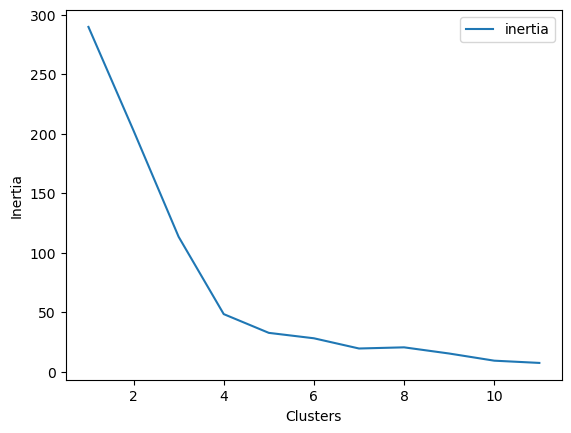

In [35]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot(x='k', y='inertia', kind='line')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** I think it is about the same although it was more vague in the original.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [36]:
# Initialize the K-Means model using the best value for k
k_means = KMeans(n_clusters=4, random_state=0)

In [37]:
# Fit the K-Means model using the PCA data
prediction = k_means.fit_predict(pca_df)

c:\Users\HollidayDDS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [38]:
# Predict the clusters to group the cryptocurrencies using the PCA data
prediction = kmeans.predict(pca_df)

# Print the resulting array of cluster values.
print(prediction)

[ 7  7  0  0  8  7  3  3  7  5 10  0  0  8  5  3 10  5  3  0  0  7  0  0
  9  0  5 10  7  1  5  5  2  7  6  9  4 10  5  0  0]


In [40]:
# Create a copy of the DataFrame with the PCA data
copy_df = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
copy_df['Prediction'] = prediction

# Display sample data
copy_df.head()

,PCA1,PCA2,PCA3,Prediction
coin_id,,,,
bitcoin,0.939421,-1.053284,-0.614803,7
ethereum,0.805420,-0.742447,-1.152022,7
tether,-0.827713,-0.197223,0.731758,0
ripple,-0.863914,-0.205298,0.564681,0
bitcoin-cash,1.672177,-2.195084,-1.551486,8


In [43]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
copy_df.hvplot.scatter(x='PCA1', y='PCA2', c='Prediction', colormap='rainbow')


:Scatter   [PCA1]   (PCA2,Prediction)

### Determine the Weights of Each Feature on each Principal Component

In [44]:
# Use the columns from the original scaled DataFrame as the index.
weights_df = pd.DataFrame(pca.components_.T, index=normalized_df.columns, columns=['PCA1', 'PCA2', 'PCA3'])
weights_df

,PCA1,PCA2,PCA3
price_change_percentage_24h,0.004901,-0.533475,0.268945
price_change_percentage_7d,0.209597,-0.228173,-0.644400
price_change_percentage_14d,0.412413,-0.303153,-0.140355
price_change_percentage_30d,0.474968,-0.134407,0.340016
price_change_percentage_60d,0.413484,0.049315,0.497421
price_change_percentage_200d,0.317867,0.485164,0.049921
price_change_percentage_1y,0.184003,0.556740,-0.132781
Prediction,0.504480,-0.074825,-0.330993


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
PCA1 Positive: price_change_percentage_30d	0.474968, Negative: NA
PCA2 Positive: price_change_percentage_1y 0.556740, Negative: price_change_percentage_24h -0.533475
PCA3 Positive: price_change_percentage_60d 0.497421, Negative: price_change_percentage_7d -0.644400
    